<a href="https://colab.research.google.com/github/seongs/ML/blob/main/S3E3_re3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/sample_submission.csv')

train.shape, test.shape, submission.shape

((1677, 35), (1119, 34), (1119, 2))

In [136]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [137]:
train.isna().sum() #결측치 수 확인

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
train.columns #칼럼 확인

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [138]:
obj_cols = []
for column in train.columns:
    if train[column].dtype == 'object':
        obj_cols.append(column)

obj_cols,len(obj_cols)
#타입이 object인 칼럼들 한 리스트에

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 8)

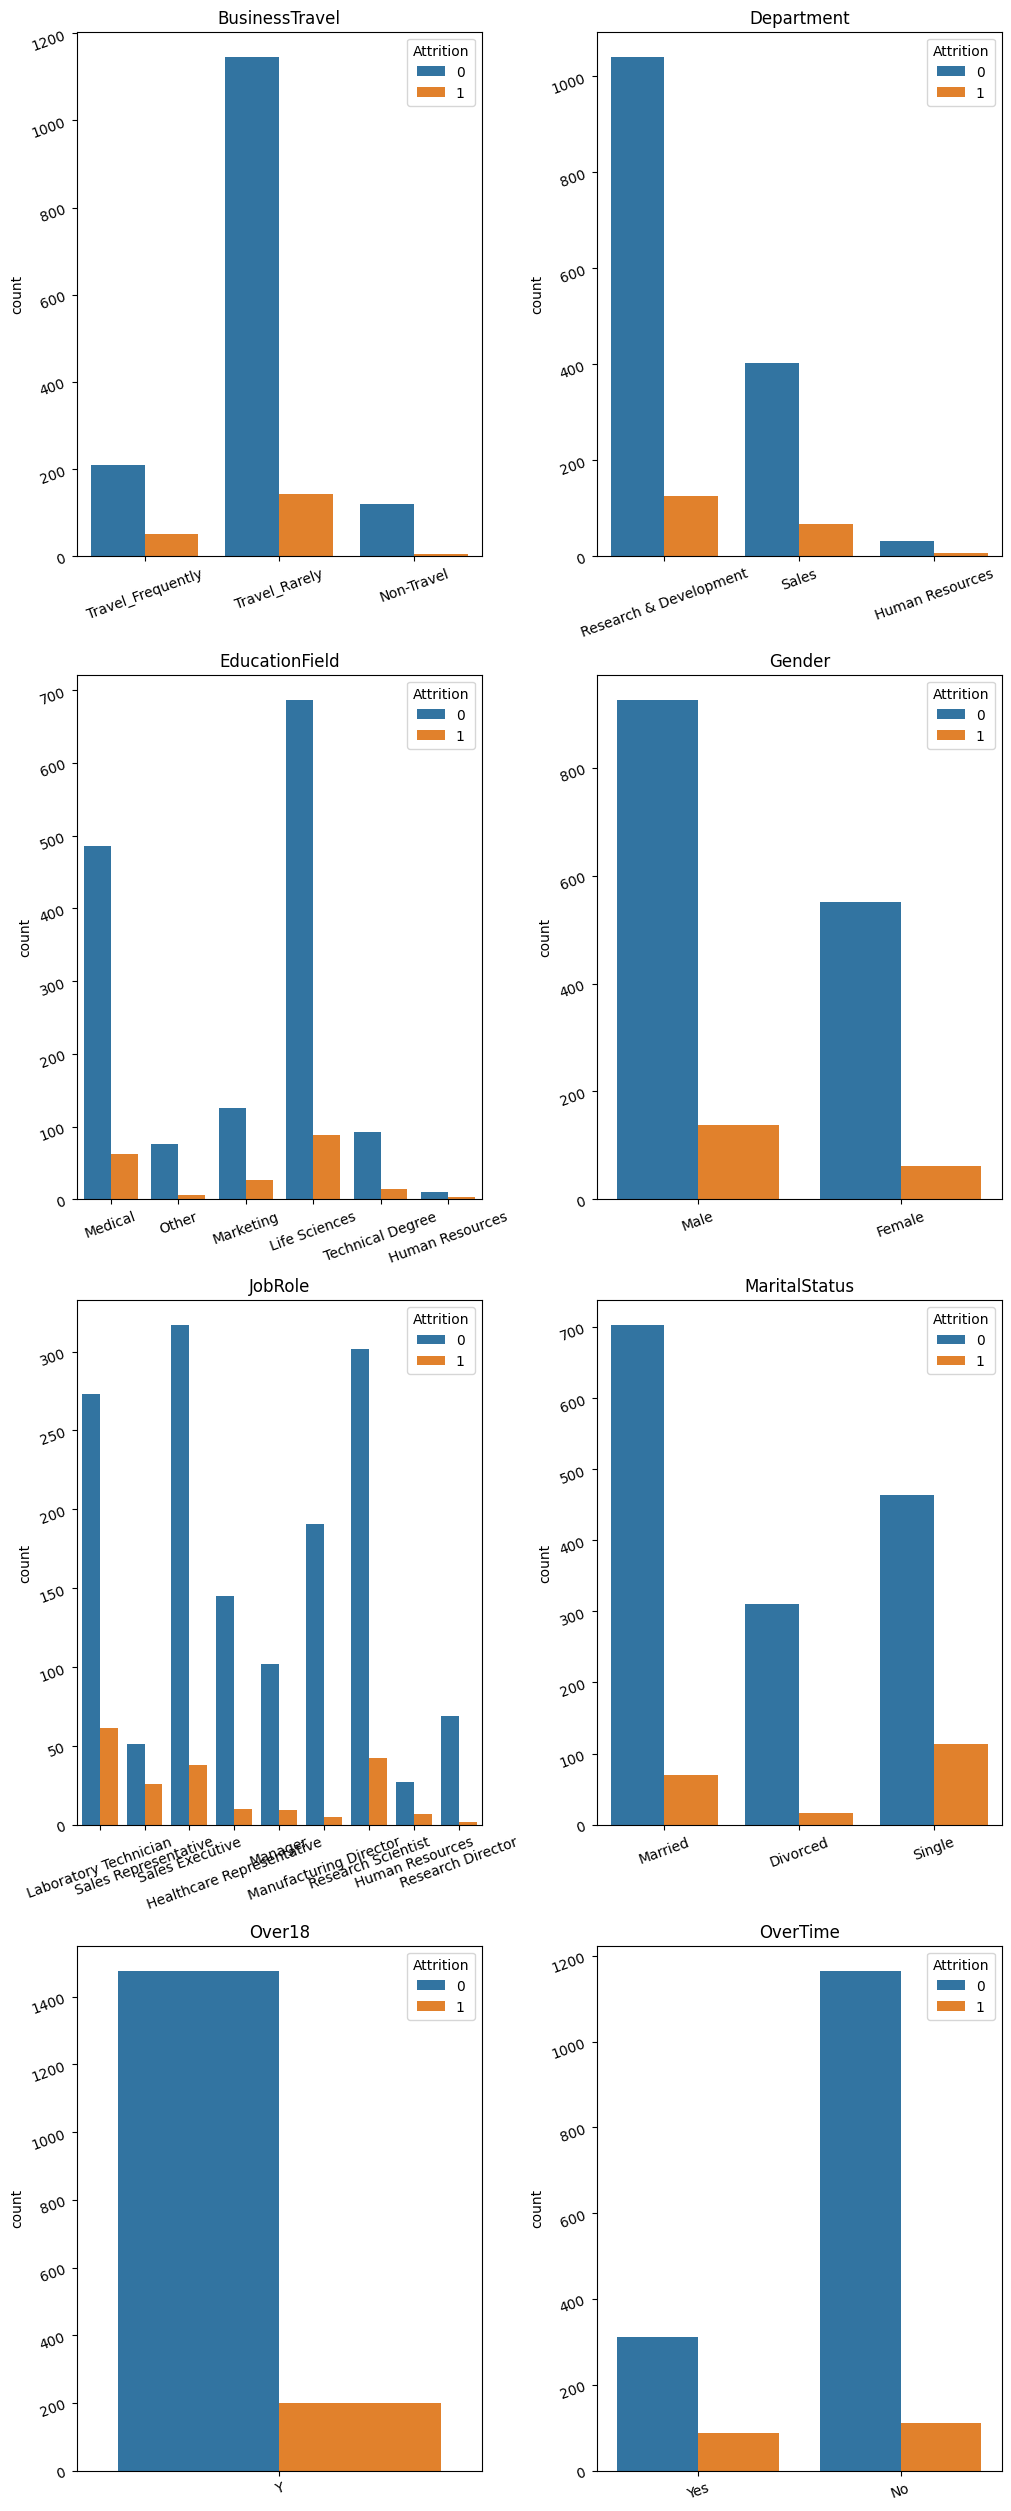

In [139]:
fig, ax = plt.subplots(4, 2, figsize=(10, 25), constrained_layout=True)
ax = ax.flatten()

for i in range(len(obj_cols)):
    sns.countplot(x=obj_cols[i], data=train,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = obj_cols[i])

    if train[obj_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)

plt.show()


In [140]:
cont_cols = []
for column in train.columns:
    if train[column].dtype != object:
        cont_cols.append(column)

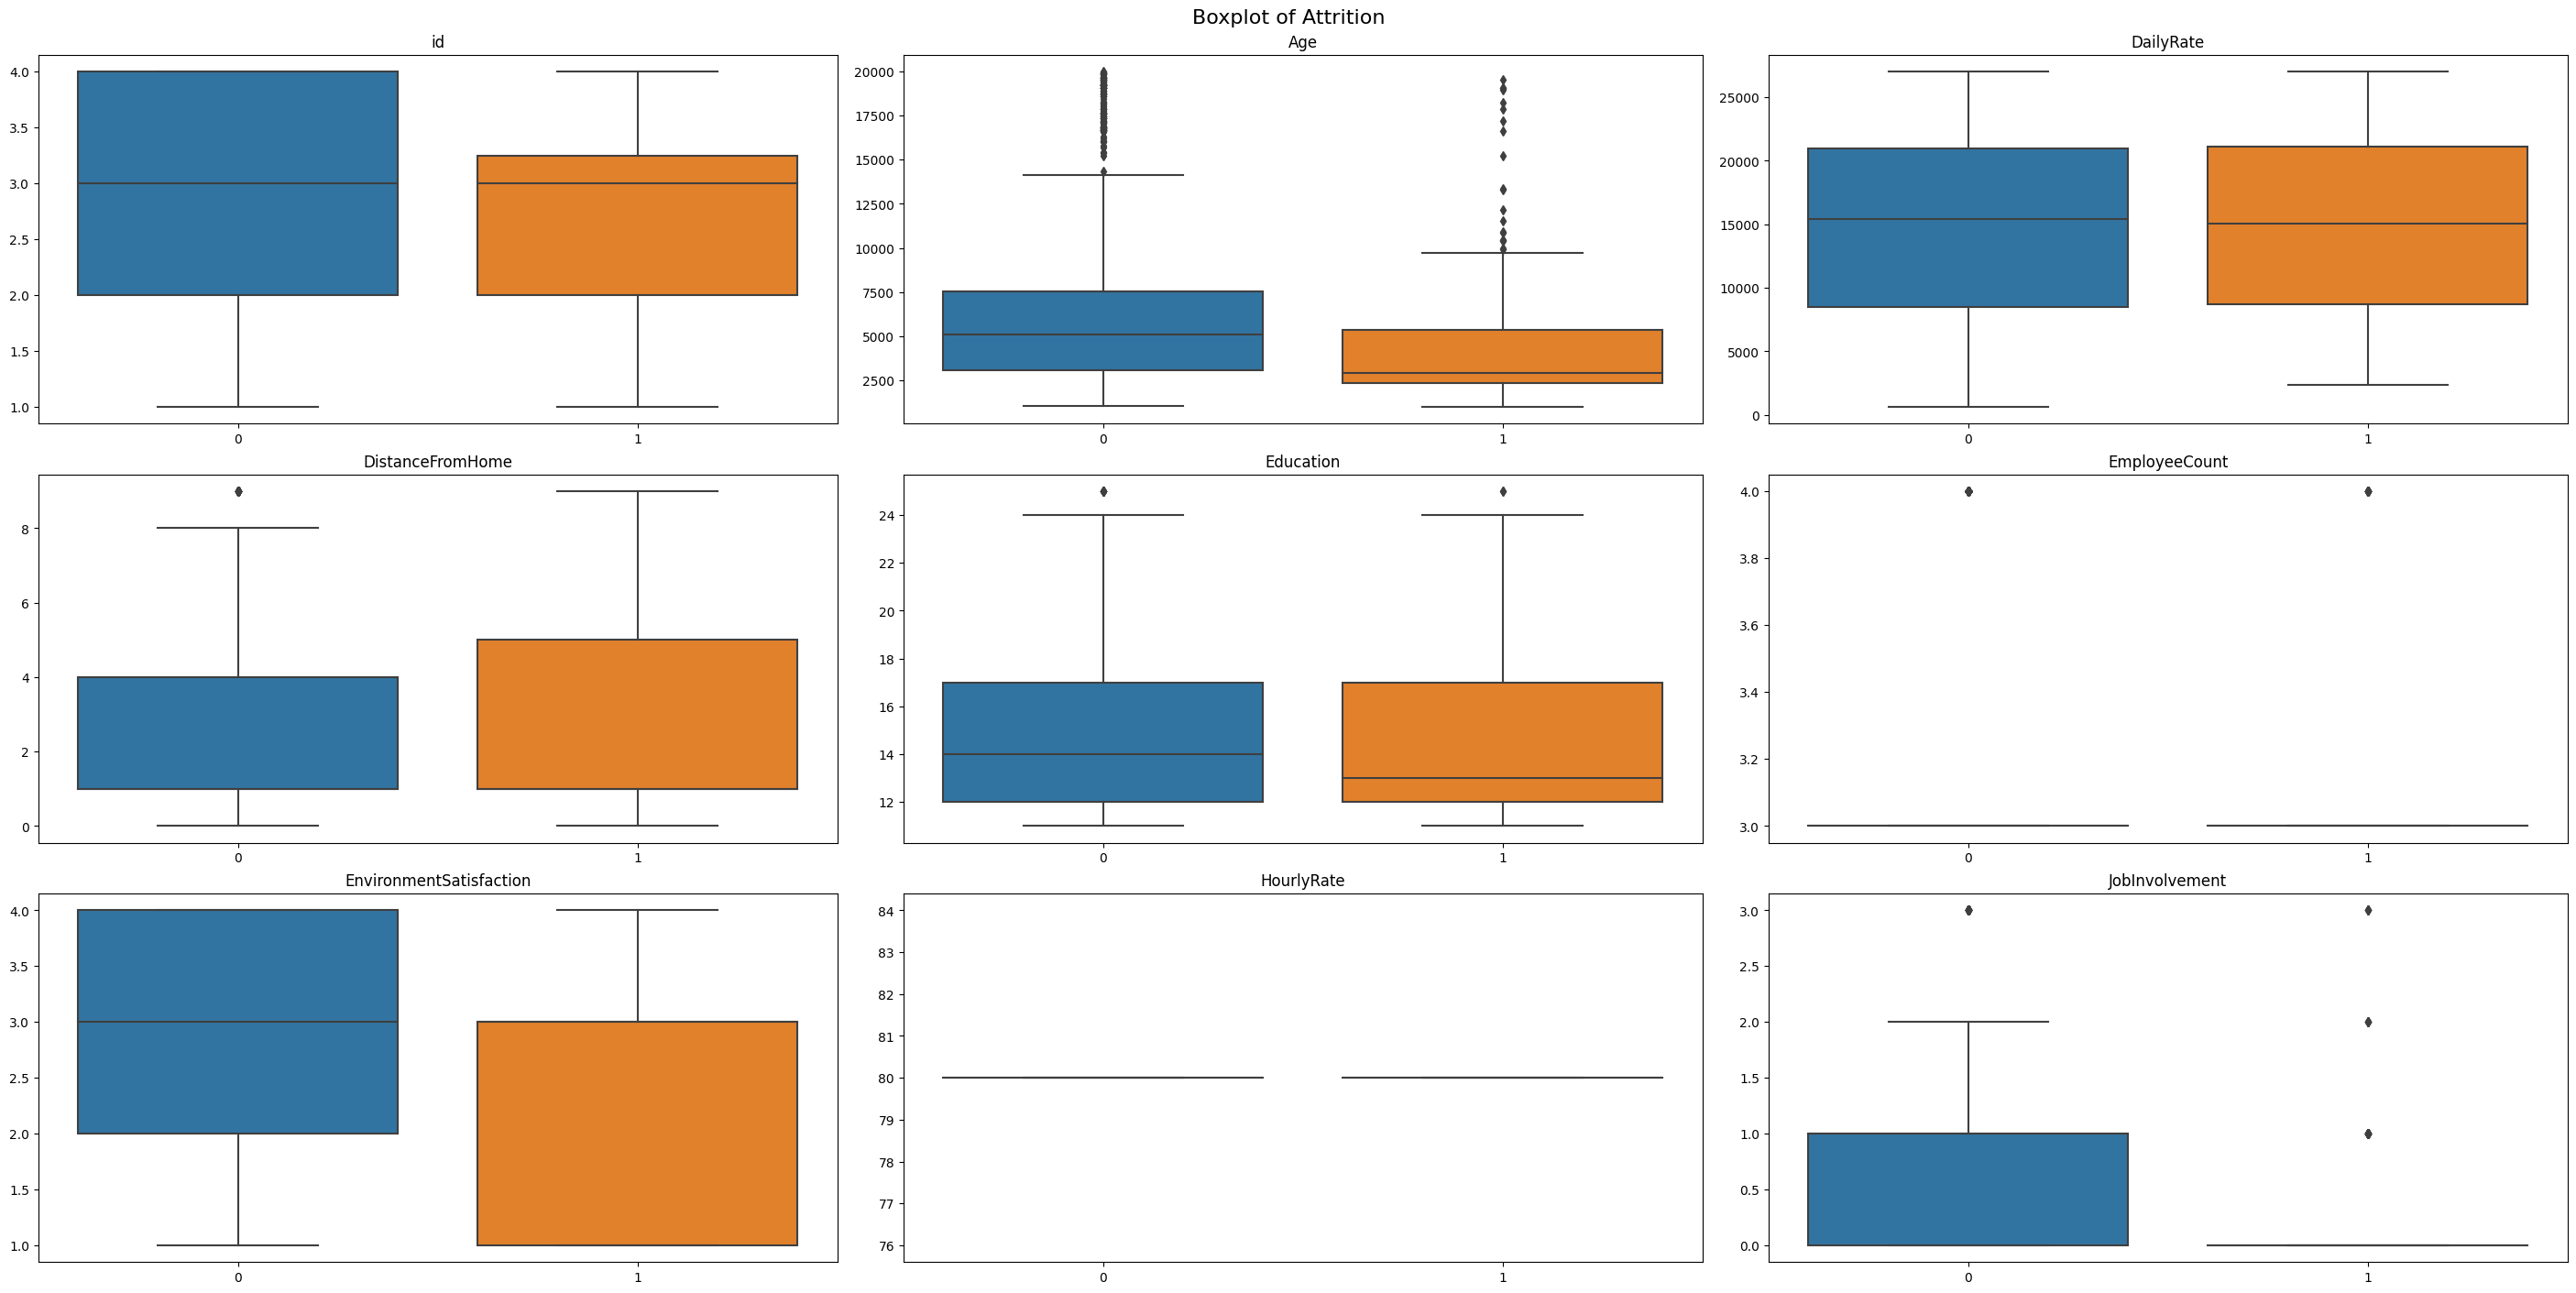

In [141]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

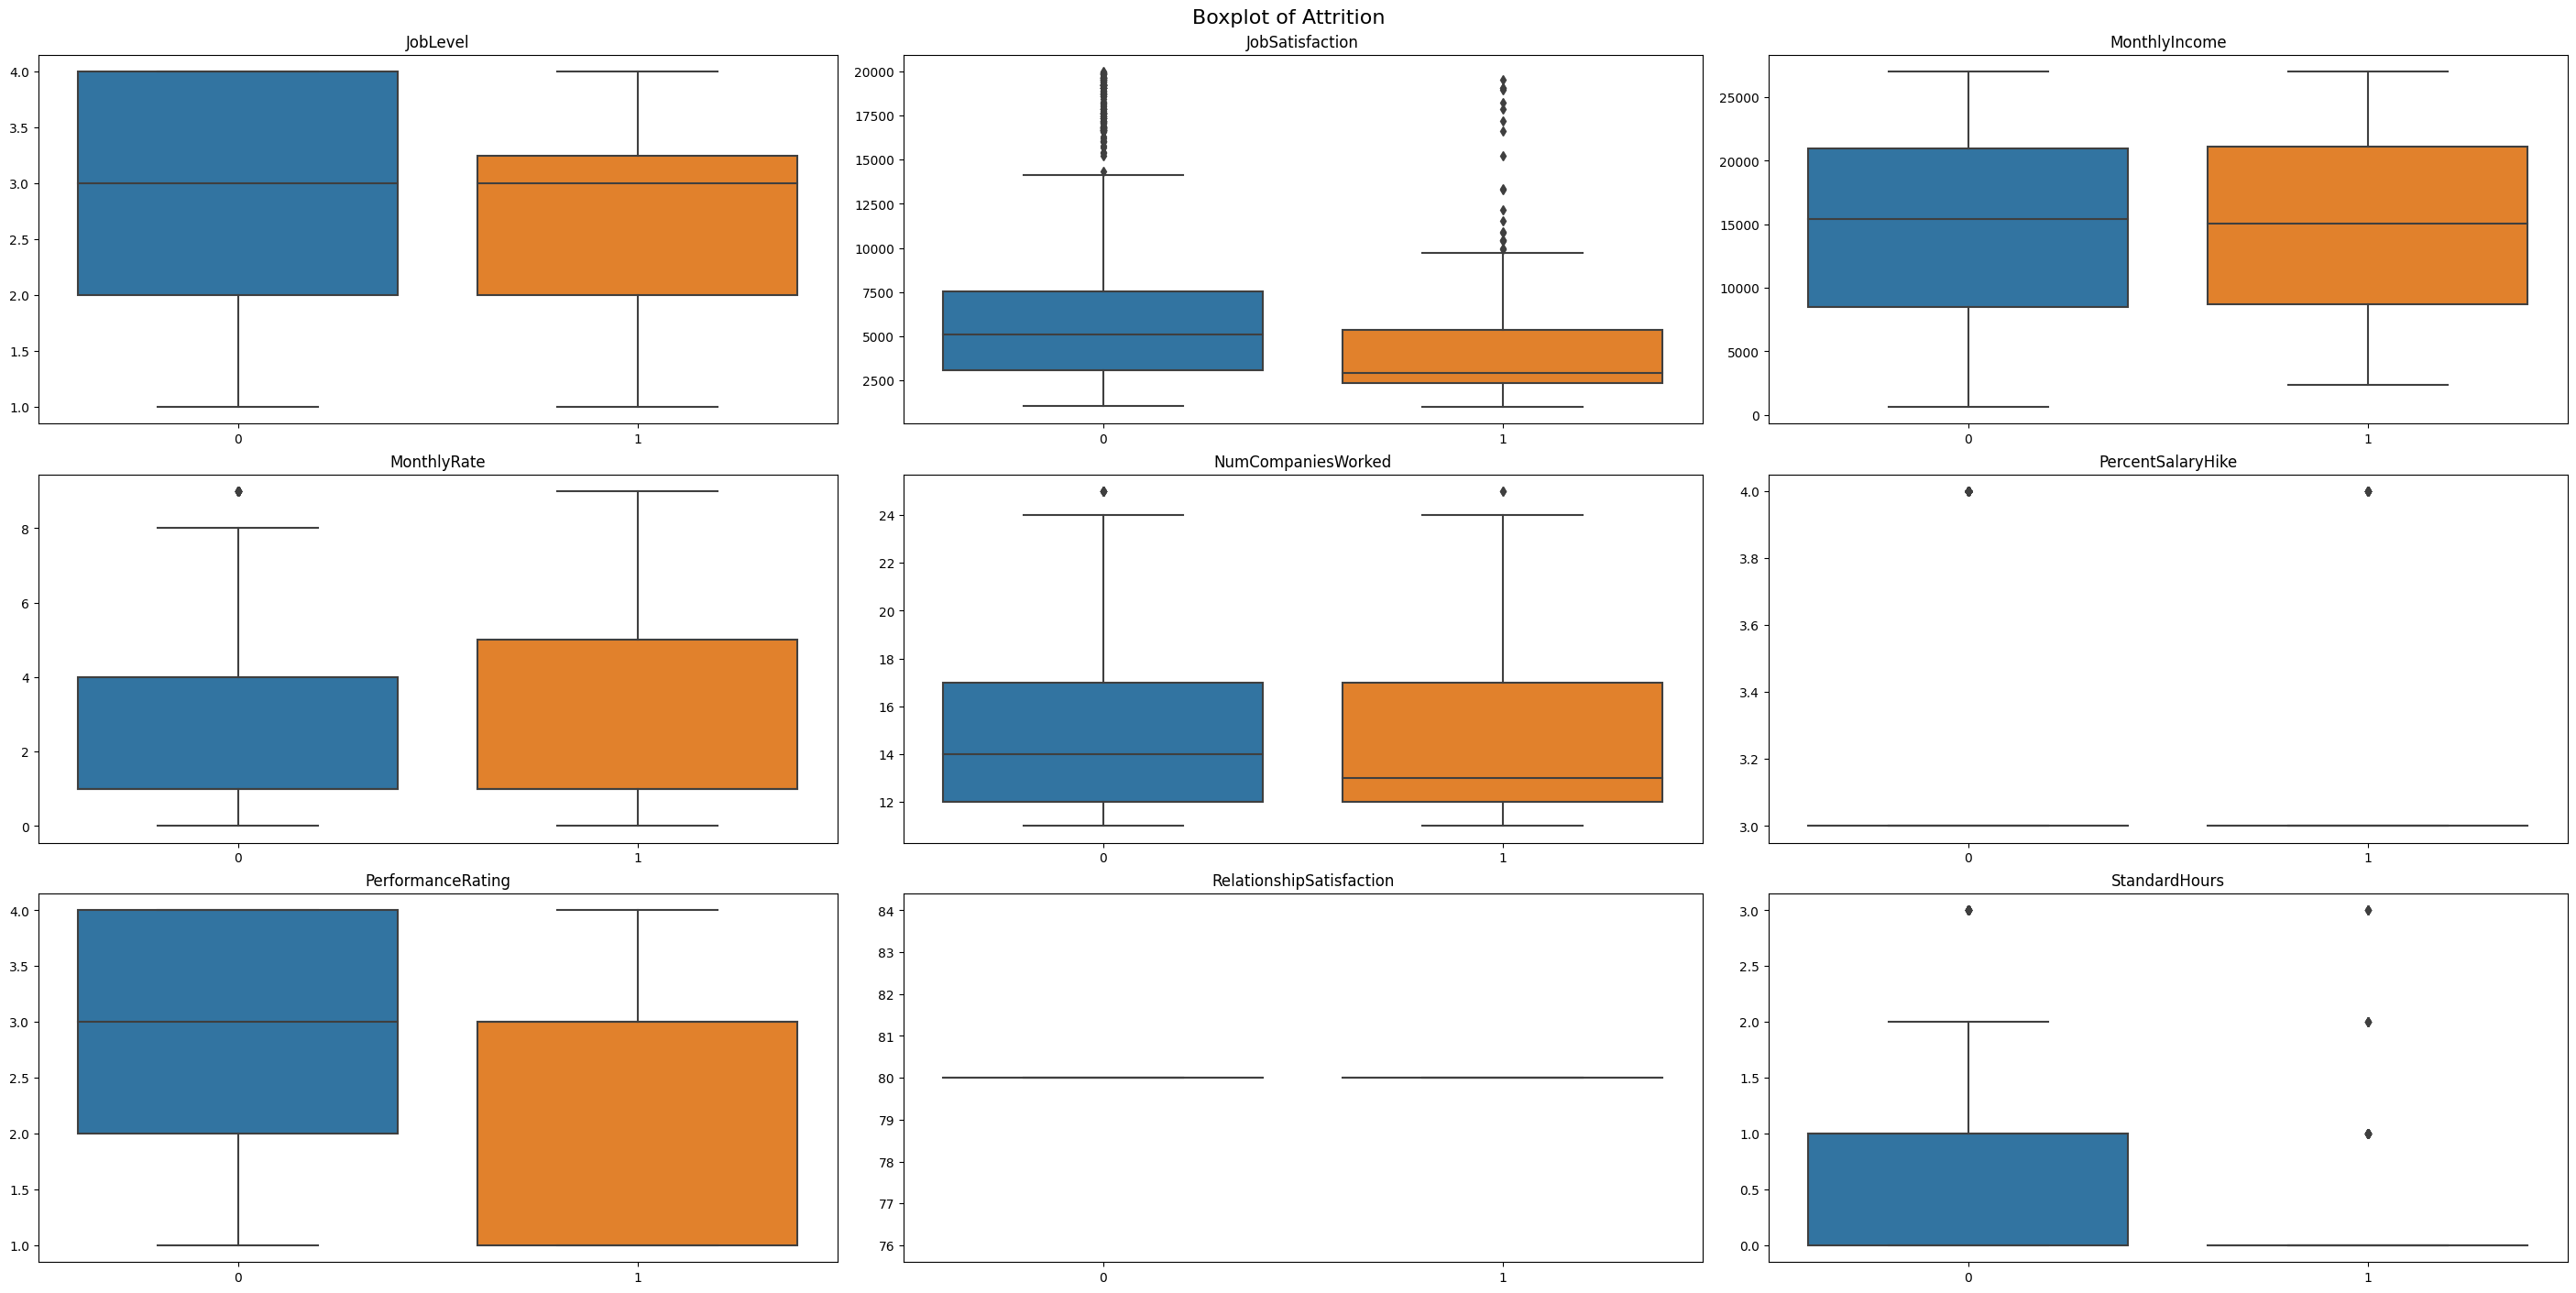

In [142]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i+9])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()
#타입이 숫자형 칼럼들 한 리스트에

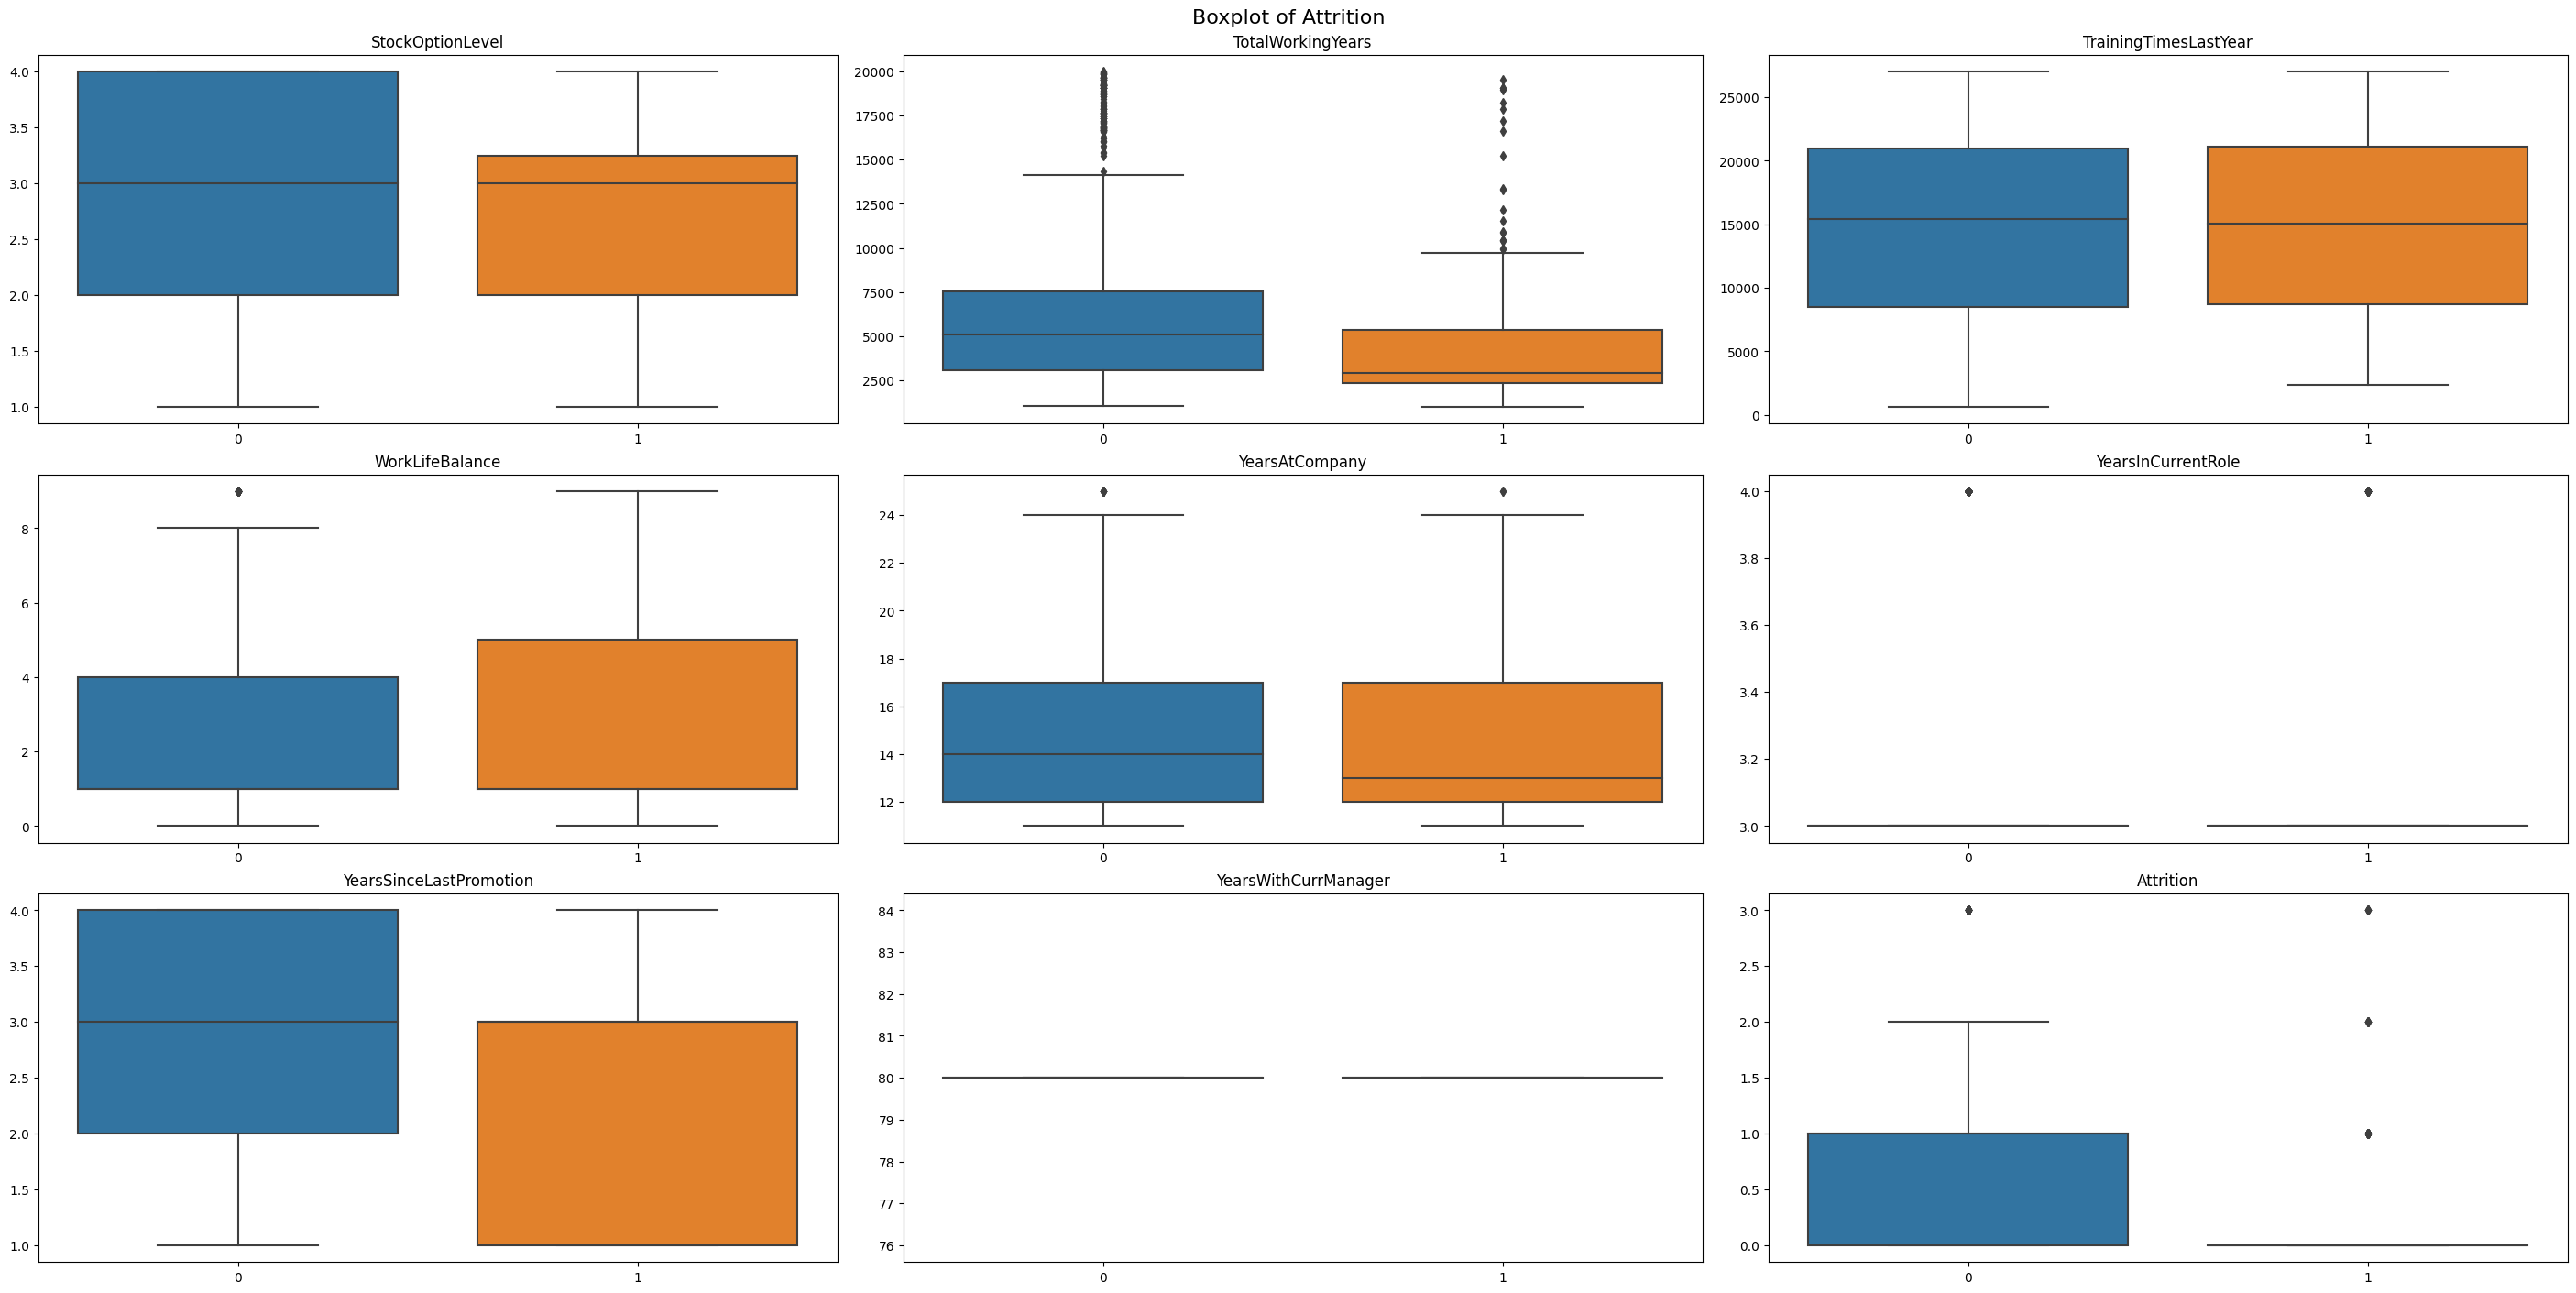

In [143]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i+18])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

In [144]:
train['EmployeeCount'].unique()

array([1])

In [145]:
train['StandardHours'].unique()

array([80])

In [146]:
train['Over18'].unique()

array(['Y'], dtype=object)

In [ ]:
test.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)
train.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)

In [147]:
object_features = [column for column in train.columns if train[column].dtype == object]

train[object_features] = train[object_features].apply(LabelEncoder().fit_transform)

In [148]:
test[object_features] = test[object_features].apply(LabelEncoder().fit_transform)

In [149]:
X = train.drop(labels= ['Attrition'], axis = 1)
y = train.Attrition

In [150]:
# 1. 모듈가져오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# 2. 데이터 준비, 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.15, stratify=y, random_state=42)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape )

# 3. 알고리즘 생성
clf = LogisticRegression()

# 4. 하이퍼파라미터튜닝 + 교차 검증 => 최적 모델 (최적 파라미터)
grid_params = {
    'C'           :[0.001, 0.01, 0.1, 0.125, 1], # 과적합 방지 규제 강도, 높을수록 강하다. L1, L2
    'max_iter'    :[600, 700, 800, 900 ], # 모델 성능을 높이기 위해 학습의 반복 회수
    'solver'     :['liblinear'],        # 과적합 방지용 L1, L2 모두 지원
    'random_state':[0, 42, 100]     # 난수시드
}
model = GridSearchCV( clf, grid_params, scoring='roc_auc', cv=5)

# 5. 학습
model.fit( X_train, y_train )

# 6. 최적값
model.best_params_, model.best_score_

(1425, 34) (252, 34) (1425,) (252,)


({'C': 0.125, 'max_iter': 600, 'random_state': 0, 'solver': 'liblinear'},
 0.7973517693930161)

In [151]:
from bayes_opt import BayesianOptimization

param_bounds = {
    'C': (0.001, 1),
    'solver': (0, 4)
}

In [152]:
def func(C,solver):

    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    solver = solvers[int(solver)]

    model = LogisticRegression(C=C, solver=solver, max_iter=1000)


    model.fit( X_train, y_train )

    return model.score( X_test, y_test)

In [153]:
optimizer = BayesianOptimization(f=func, pbounds=param_bounds,random_state=42)

optimizer.maximize(init_points=10, n_iter=100, acq='ei', xi=0.01)

|   iter    |  target   |     C     |  solver   |
-------------------------------------------------
| 1         | 0.881     | 0.3752    | 3.803     |
| 2         | 0.8889    | 0.7323    | 2.395     |
| 3         | 0.8889    | 0.1569    | 0.624     |
| 4         | 0.881     | 0.05903   | 3.465     |
| 5         | 0.8889    | 0.6015    | 2.832     |
| 6         | 0.881     | 0.02156   | 3.88      |
| 7         | 0.8849    | 0.8326    | 0.8494    |
| 8         | 0.8889    | 0.1826    | 0.7336    |
| 9         | 0.881     | 0.3049    | 2.099     |
| 10        | 0.8849    | 0.4325    | 1.165     |
| 11        | 0.8889    | 1.0       | 2.745     |
| 12        | 0.8849    | 0.6293    | 0.0003903 |
| 13        | 0.8889    | 1.0       | 2.109     |
| 14        | 0.881     | 0.001     | 0.0       |
| 15        | 0.881     | 1.0       | 3.274     |
| 16        | 0.8889    | 1.0       | 2.436     |
| 17        | 0.881     | 1.0       | 1.61      |
| 18        | 0.8849    | 0.484     | 0.5404    |


In [ ]:
optimizer.max

{'target': 0.8968253968253969,
 'params': {'C': 0.08352066282505195, 'solver': 0.559382748103129}}

In [ ]:
clf = LogisticRegression(C=0.08352066282505195,solver='newton-cg')

# 5. 학습
model.fit( X_train, y_train )

# 6. 최적값
model.best_params_, model.best_score_

({'C': 0.1, 'max_iter': 600, 'random_state': 0, 'solver': 'liblinear'},
 0.7932505273025544)

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = model.best_estimator_.predict_proba( X_test )[ :, 1]

roc_auc_score(y_test, y_pred) # 모델 성능값과 비교해서 과적합 판단

0.7174174174174174

In [ ]:
y_pred_submission = model.best_estimator_.predict_proba(test )[:, 1]
# 값을 세팅
submission['Attrition'] = y_pred_submission
# kaggle에 제출할 파일 생성
submission.to_csv( 'ksy_submission_ver2.csv', index=False )

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.0 MB/s et

In [ ]:
reg = setup( data=train,
             target= 'Attrition',
             verbose=True,
             train_size=0.9,
             data_split_shuffle=True,
             normalize=True,
             session_id=100)

,Description,Value
0,Session id,100
1,Target,Attrition
2,Target type,Regression
3,Original data shape,"(1677, 31)"
4,Transformed data shape,"(1677, 31)"
5,Transformed train set shape,"(1509, 31)"
6,Transformed test set shape,"(168, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
top6_models = compare_models( fold=5, round=3, n_select=6, errors='ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.181,0.089,0.298,0.146,0.210,0.718,0.338
et,Extra Trees Regressor,0.181,0.091,0.301,0.130,0.213,0.703,0.356
br,Bayesian Ridge,0.201,0.092,0.303,0.122,0.213,0.768,0.062
rf,Random Forest Regressor,0.184,0.092,0.303,0.120,0.214,0.729,1.438
ridge,Ridge Regression,0.205,0.092,0.303,0.119,0.215,0.752,0.032
lr,Linear Regression,0.205,0.092,0.303,0.118,0.215,0.752,1.978
lightgbm,Light Gradient Boosting Machine,0.192,0.093,0.304,0.108,0.214,0.696,1.912
lar,Least Angle Regression,0.210,0.095,0.307,0.096,0.218,0.748,0.048
omp,Orthogonal Matching Pursuit,0.201,0.096,0.310,0.080,0.217,0.806,0.056
xgboost,Extreme Gradient Boosting,0.193,0.101,0.317,0.027,0.225,0.714,0.408


Processing:   0%|          | 0/86 [00:00<?, ?it/s]

In [ ]:
top6_models

[GradientBoostingRegressor(random_state=100),
 ExtraTreesRegressor(n_jobs=-1, random_state=100),
 BayesianRidge(),
 RandomForestRegressor(n_jobs=-1, random_state=100),
 Ridge(random_state=100),
 LinearRegression(n_jobs=-1)]

In [ ]:
reg_blended = blend_models(estimator_list=top6_models, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1977,0.0922,0.3037,0.1613,0.2131,0.7495
1,0.1670,0.0678,0.2603,0.2425,0.1863,0.6890
2,0.2247,0.1197,0.3459,0.1605,0.2369,0.7469
3,0.1858,0.0898,0.2997,0.0522,0.2131,0.7972
4,0.1759,0.0775,0.2783,0.1341,0.1968,0.7465
5,0.2109,0.1073,0.3276,0.2470,0.2228,0.7150
6,0.1811,0.0828,0.2878,0.1256,0.2032,0.7659
7,0.1815,0.0759,0.2755,0.0979,0.1986,0.7401
8,0.1704,0.0651,0.2552,0.2258,0.1843,0.6821


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
model = finalize_model( reg_blended )
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'BusinessTravel',
                                             'DailyRate', 'Department',
                                             'DistanceFromHome', 'Education',
                                             'EducationField',
                                             'EnvironmentSatisfaction',
                                             'Gender', 'HourlyRate',
                                             'JobInvolvement', 'JobLevel',
                                             'JobRole', 'JobSatisfaction',
                                             'MaritalStatus', 'MonthlyIncome',
                                             'MonthlyRate',
                                             'NumCompan...
                 VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=100)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=100)),
                                             ('Ridge Regression',
                                              Ridge(random_state=100)),
                                             ('Linear Regression',
                                              LinearRegression(n_jobs=-1))],
                                 n_jobs=-1))])

In [ ]:
predict_model( model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1386,0.0420,0.2050,0.5993,0.1403,0.5080


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,prediction_label
1290,44,2,523,1,2,4,1,3,1,92,...,1,6,4,3,4,3,0,2,0,-0.011484
1017,19,2,722,2,25,2,2,3,0,73,...,0,1,4,2,1,0,0,0,1,0.622362
143,34,2,489,1,2,3,3,3,0,75,...,1,10,5,4,0,0,0,0,0,0.043133
1466,27,2,1082,2,4,3,3,3,1,97,...,0,8,6,3,8,7,1,2,0,0.098897
1187,25,2,541,1,2,3,1,1,1,39,...,1,5,4,3,5,2,1,2,0,0.094577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,30,2,652,1,10,3,3,4,1,43,...,1,12,6,2,12,9,5,9,0,0.059018
1650,50,2,1223,1,1,3,3,3,1,40,...,1,8,5,3,5,4,0,1,0,0.021992
635,52,2,1354,1,4,3,1,3,1,93,...,0,9,2,3,5,4,0,2,1,0.345955
101,28,2,1303,1,2,4,3,3,1,30,...,1,5,1,3,5,2,3,0,0,0.056469


In [ ]:
sub_y_pred = predict_model( model, data = test)
submission['Attrition'] = y_pred_submission
submission.to_csv('submission_v3.csv', index=False)

In [154]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 8.3 MB

In [157]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

predictor = TabularPredictor(label='Attrition').fit(train_data=train) #auto_stack = True
print(predictor.fit_summary())
print(predictor.get_model_best())

No path specified. Models will be saved in: "AutogluonModels/ag-20231027_133815/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231027_133815/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   79.17 GB / 115.66 GB (68.5%)
Train Data Rows:    1677
Train Data Columns: 34
Label Column: Attrition
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:  

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.898810       0.309970  7.969592                0.001518           0.893097            2       True         13
1        NeuralNetTorch   0.892857       0.014350  1.892798                0.014350           1.892798            1       True         11
2              LightGBM   0.889881       0.005708  1.138435                0.005708           1.138435            1       True          4
3            LightGBMXT   0.889881       0.012519  0.895320                0.012519           0.895320            1       True          3
4              CatBoost   0.886905       0.007522  5.004495                0.007522           5.004495            1       True          7
5         LightGBMLarge   0.886905       0.013345  1.431159                0.013345           1.431159        

In [159]:
# 각 모델 훈련 성능 평가
leaderboard_df  = predictor.leaderboard(train, silent=True)
print(leaderboard_df)

                  model  score_test  score_val  pred_time_test  pred_time_val  \
0              LightGBM    0.977937   0.889881        0.044820       0.005708   
1         LightGBMLarge    0.977340   0.886905        0.174908       0.013345   
2      RandomForestGini    0.976744   0.883929        0.333350       0.089456   
3        ExtraTreesEntr    0.976148   0.880952        0.418521       0.177444   
4      RandomForestEntr    0.975552   0.877976        0.318490       0.099298   
5        ExtraTreesGini    0.974955   0.875000        0.350818       0.204010   
6        KNeighborsDist    0.973763   0.869048        0.235160       0.028871   
7       NeuralNetFastAI    0.959451   0.863095        0.141157       0.022469   
8   WeightedEnsemble_L2    0.955874   0.898810        0.363837       0.309970   
9              CatBoost    0.949314   0.886905        0.024565       0.007522   
10           LightGBMXT    0.933810   0.889881        0.036117       0.012519   
11       NeuralNetTorch    0